<a href="https://colab.research.google.com/github/npr99/IN-CORE_notebooks/blob/main/IN_CORE_Seaside_CommunityDescription.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Community Description
Author: [Nathanael Rosenheim](https://scholars.library.tamu.edu/vivo/display/n0f782eb9/Persons/View%20All)

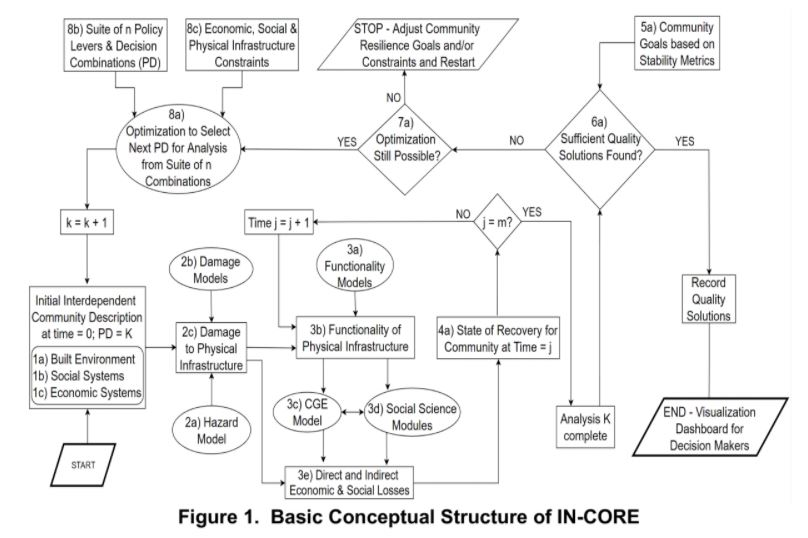

## Basic Conceptual Structure of IN-CORE
Step 1 in IN-CORE is to establish initial interdepent community description at time 0 and with policy levers and decision combinations set to K (baseline case). The community description includes three parts - the built enviroment, social systems, and economic systems. This notebook helps explore the data currently available in IN-CORE for the Seaside Testbed.

Seaside, OR is a community located on the Pacific Ocean in Northwest Oregon. The city has a high earthquake and tsunami risks.

In [1]:
import pandas as pd
import geopandas as gpd # For reading in shapefiles
import numpy as np
import sys # For displaying package versions
import os # For managing directories and file paths if drive is mounted

from pyincore import IncoreClient, Dataset, FragilityService, MappingSet, DataService
from pyincore.analyses.buildingdamage.buildingdamage import BuildingDamage

from pyincore_viz.geoutil import GeoUtil as viz

In [2]:
# Check package versions - good practice for replication
print("Python Version ",sys.version)
print("pandas version: ", pd.__version__)
print("numpy version: ", np.__version__)

Python Version  3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 15:59:12) 
[Clang 11.0.1 ]
pandas version:  1.3.3
numpy version:  1.21.2


In [3]:
# Check working directory - good practice for relative path access
os.getcwd()

'/Users/dylan/Box/OSU/models/pyincore_seaside_jb/nb2'

In [4]:
client = IncoreClient()
# IN-CORE chaches files on the local machine, it might be necessary to clear the memory
#client.clear_cache() 

Connection successful to IN-CORE services. pyIncore version detected: 1.0.0


In [5]:
# create data_service object for loading files
data_service = DataService(client)

## 1a) Built enviroment: Building Inventory

The building inventory for Seaside consists of 4,679 parcels

In [6]:
# Temporary Seaside, OR Building Inventory v6
# building_inv = Dataset.from_file("IN-CORE_Seaside_BuildingInventory_2021-03-19.shp", data_type='ergo:buildingInventoryVer6')
bldg_dataset_id = "613ba5ef5d3b1d6461e8c415"        # defining building dataset (GIS point layer)
building_inv = Dataset.from_data_service(bldg_dataset_id, data_service)


Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


In [7]:
bldg_inv_gdf = building_inv.get_dataframe_from_shapefile()

# bldg_inv_gdf = gpd.read_file("IN-CORE_Seaside_BuildingInventory_2021-03-19.shp")
bldg_inv_gdf.head()

,parid,parid_card,bldg_id,struct_typ,str_prob,year_built,no_stories,a_stories,b_stories,bsmt_type,...,guid,FID_NEW,origin,stat_class,rmv_improv,rmv_land,elev,period,strctid,geometry
0,None,None,None,W1,None,1968,1,None,None,None,...,fba4c73f-9b1b-4942-b7fb-bc276a4e0a4e,5783,1,193,0.0,0.0,-1.037119,0.35,41007020933038031S,POINT (-123.90900 46.01433)
1,None,None,None,W1,None,1992,1,None,None,None,...,65d6e370-c05b-4b2f-bd17-d914d1d056c7,5782,1,193,0.0,0.0,-14.826966,0.35,41007022416079053S,POINT (-123.90585 45.99795)
2,None,None,None,W1,None,1974,1,None,None,None,...,dad76485-9694-409e-ac7f-c64c7bd5c32c,5781,1,191,0.0,0.0,-1.037119,0.35,41007020933038014S,POINT (-123.90900 46.01433)
3,None,None,None,W1,None,1984,1,None,None,None,...,6f57cfb6-d244-40d5-96f5-03aeddd5e30a,5780,1,193,0.0,0.0,-1.037119,0.35,41007020933038018S,POINT (-123.90900 46.01433)
4,None,None,None,W1,None,1964,1,None,None,None,...,929f1040-6224-409d-b4e3-58946daf3b91,5779,1,190,0.0,0.0,-1.729172,0.35,41007022789002002S,POINT (-123.91183 45.99747)


In [8]:
bldg_inv_gdf.columns

Index(['parid', 'parid_card', 'bldg_id', 'struct_typ', 'str_prob',
       'year_built', 'no_stories', 'a_stories', 'b_stories', 'bsmt_type',
       'sq_foot', 'gsq_foot', 'occ_type', 'occ_detail', 'major_occ',
       'broad_occ', 'appr_bldg', 'repl_cst', 'str_cst', 'nstra_cst',
       'nstrd_cst', 'dgn_lvl', 'cont_val', 'efacility', 'dwell_unit',
       'str_typ2', 'occ_typ2', 'tract_id', 'guid', 'FID_NEW', 'origin',
       'stat_class', 'rmv_improv', 'rmv_land', 'elev', 'period', 'strctid',
       'geometry'],
      dtype='object')

In [9]:
bldg_inv_gdf[['guid','strctid','struct_typ','struct_typ','year_built','occ_type']].head()

,guid,strctid,struct_typ,struct_typ,year_built,occ_type
0,fba4c73f-9b1b-4942-b7fb-bc276a4e0a4e,41007020933038031S,W1,W1,1968,None
1,65d6e370-c05b-4b2f-bd17-d914d1d056c7,41007022416079053S,W1,W1,1992,None
2,dad76485-9694-409e-ac7f-c64c7bd5c32c,41007020933038014S,W1,W1,1974,None
3,6f57cfb6-d244-40d5-96f5-03aeddd5e30a,41007020933038018S,W1,W1,1984,None
4,929f1040-6224-409d-b4e3-58946daf3b91,41007022789002002S,W1,W1,1964,None


In [10]:
bldg_inv_gdf['strctid'].describe()

count                   4679
unique                  4679
top       41007020933038031S
freq                       1
Name: strctid, dtype: object

In [11]:
bldg_inv_gdf[['guid','strctid','struct_typ','year_built','occ_type']].groupby('struct_typ').count()

,guid,strctid,year_built,occ_type
struct_typ,,,,
RC,1504,1504,1504,0
W1,2444,2444,2444,0
W2,731,731,731,0


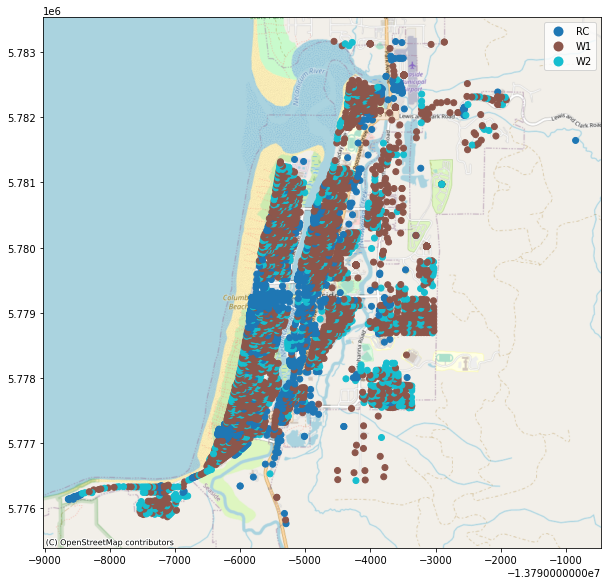

In [12]:
map = viz.plot_gdf_map(bldg_inv_gdf,column='struct_typ')
map

In [13]:
bldg_inv_gdf

,parid,parid_card,bldg_id,struct_typ,str_prob,year_built,no_stories,a_stories,b_stories,bsmt_type,...,guid,FID_NEW,origin,stat_class,rmv_improv,rmv_land,elev,period,strctid,geometry
0,None,None,None,W1,None,1968,1,None,None,None,...,fba4c73f-9b1b-4942-b7fb-bc276a4e0a4e,5783,1,193,0.0,0.0,-1.037119,0.35,41007020933038031S,POINT (-123.90900 46.01433)
1,None,None,None,W1,None,1992,1,None,None,None,...,65d6e370-c05b-4b2f-bd17-d914d1d056c7,5782,1,193,0.0,0.0,-14.826966,0.35,41007022416079053S,POINT (-123.90585 45.99795)
2,None,None,None,W1,None,1974,1,None,None,None,...,dad76485-9694-409e-ac7f-c64c7bd5c32c,5781,1,191,0.0,0.0,-1.037119,0.35,41007020933038014S,POINT (-123.90900 46.01433)
3,None,None,None,W1,None,1984,1,None,None,None,...,6f57cfb6-d244-40d5-96f5-03aeddd5e30a,5780,1,193,0.0,0.0,-1.037119,0.35,41007020933038018S,POINT (-123.90900 46.01433)
4,None,None,None,W1,None,1964,1,None,None,None,...,929f1040-6224-409d-b4e3-58946daf3b91,5779,1,190,0.0,0.0,-1.729172,0.35,41007022789002002S,POINT (-123.91183 45.99747)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4674,None,None,None,RC,None,0,1,None,None,None,...,6b0688f7-c132-4330-9c21-1585dd85c72d,7,1,790,0.0,189960.0,-1.657575,0.40,6b0688f7-c132-4330-9c21-1585dd85c72d,POINT (-123.90927 46.01745)
4675,None,None,None,W1,None,1940,1,None,None,None,...,463b4421-253b-457e-bb5c-3175c1f02c1d,6,1,123,33704.0,0.0,-2.180728,0.35,41007020853008007S,POINT (-123.91364 46.01733)
4676,None,None,None,W2,None,1981,2,None,None,None,...,4a77a5a2-22c7-468f-be8e-3de39fed3a85,5,1,177,1115868.0,1259201.0,-0.852036,0.40,4a77a5a2-22c7-468f-be8e-3de39fed3a85,POINT (-123.91612 46.01746)
4677,None,None,None,W1,None,1936,1,None,None,None,...,04819c03-9e77-4a0e-96b7-5f9ef5067351,4,1,142,305479.0,1674127.0,-0.549215,0.35,41007020802001001S,POINT (-123.91862 46.01757)


## 1b) Social Systems: Housing Unit Inventory

The housing unit inventory includes characteristics for individual households and housing units that can be linked to residential buildings. 
For more information see:
>Rosenheim, Nathanael, Roberto Guidotti, Paolo Gardoni & Walter Gillis Peacock. (2019). Integration of detailed household and housing unit characteristic data with critical infrastructure for post-hazard resilience modeling. Sustainable and Resilient Infrastructure. doi.org/10.1080/23789689.2019.1681821


In [14]:
# Seaside Housing Unit Inventory
housing_unit_inv_id = "5d543087b9219c0689b98234"
# load housing unit inventory as pandas dataframe
housing_unit_inv = Dataset.from_data_service(housing_unit_inv_id, data_service)
filename = housing_unit_inv.get_file_path('csv')
print("The IN-CORE Dataservice has saved the Housing Unit Inventory on your local machine: "+filename)

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
The IN-CORE Dataservice has saved the Housing Unit Inventory on your local machine: /Users/dylan/.incore/cache_data/5d543087b9219c0689b98234/IN-CORE_1bv6_SetupSeaside_FourInventories_2019-08-02_HUinventory/IN-CORE_1bv6_SetupSeaside_FourInventories_2019-08-02_HUinventory.csv


In [15]:
housing_unit_inv_df = pd.read_csv(filename, header="infer")
housing_unit_inv_df.head()

,blockid,blockidstr,huid,livetype,numprec,ownershp,race,hispan,vacancy,gqtype,bgid
0,410079501001001,B410079501001001,B410079501001001H001,H,2,1.0,1.0,0.0,0,0,410079501001
1,410079501001001,B410079501001001,B410079501001001H002,H,2,2.0,1.0,0.0,0,0,410079501001
2,410079501001001,B410079501001001,B410079501001001H003,H,1,1.0,1.0,0.0,0,0,410079501001
3,410079501001003,B410079501001003,B410079501001003H001,H,4,2.0,4.0,0.0,0,0,410079501001
4,410079501001003,B410079501001003,B410079501001003H002,H,1,2.0,1.0,0.0,0,0,410079501001


In [16]:
housing_unit_inv_df.columns

Index(['blockid', 'blockidstr', 'huid', 'livetype', 'numprec', 'ownershp',
       'race', 'hispan', 'vacancy', 'gqtype', 'bgid'],
      dtype='object')

### Explore Housing Unit Characteristics
The housing unit inventory includes characteristics based on the 2010 Decennial Census. 

### Race and Ethnicity
The housing unit inventory includes variables for race and ethnicity.

In [17]:
housing_unit_inv_df['Race Ethnicity'] = "0 Vacant HU No Race Ethnicity Data"
housing_unit_inv_df['Race Ethnicity'].notes = "Identify Race and Ethnicity Housing Unit Characteristics."

housing_unit_inv_df.loc[(housing_unit_inv_df['race'] == 1) & 
                        (housing_unit_inv_df['hispan'] == 0),'Race Ethnicity'] = "1 White alone, Not Hispanic"
housing_unit_inv_df.loc[(housing_unit_inv_df['race'] == 2) & 
                        (housing_unit_inv_df['hispan'] == 0),'Race Ethnicity'] = "2 Black alone, Not Hispanic"
housing_unit_inv_df.loc[(housing_unit_inv_df['race'].isin([3,4,5,6,7])) & 
                        (housing_unit_inv_df['hispan'] == 0),'Race Ethnicity'] = "3 Other Race, Not Hispanic"
housing_unit_inv_df.loc[(housing_unit_inv_df['hispan'] == 1),'Race Ethnicity'] = "4 Any Race, Hispanic"
housing_unit_inv_df.loc[(housing_unit_inv_df['gqtype'] >= 1),'Race Ethnicity'] = "5 Group Quarters no Race Ethnicity Data"

housing_unit_inv_df['Tenure Status'] = "0 No Tenure Status"
housing_unit_inv_df.loc[(housing_unit_inv_df['ownershp'] == 1),'Tenure Status'] = "1 Owner Occupied"
housing_unit_inv_df.loc[(housing_unit_inv_df['ownershp'] == 2),'Tenure Status'] = "2 Renter Occupied"
housing_unit_inv_df['Tenure Status'].notes = "Identify Tenure Status Housing Unit Characteristics."

In [18]:
table = pd.pivot_table(housing_unit_inv_df, values='numprec', index=['Race Ethnicity'],
                                     margins = True, margins_name = 'Total',
                                     columns=['Tenure Status'], aggfunc=[np.sum]).rename(
    columns={'Total': 'Total Population', 'sum': ''})
table_title = "Table 1. Total Population by Race, Ethncity, and Tenure Status, Jefferson and Newton Counties, 2010."
varformat = {('','Total Population'): "{:,.0f}",
             ('','1 Owner Occupied'): "{:,.0f}",
             ('','2 Renter Occupied'): "{:,.0f}"}
table.style.set_caption(table_title).format(varformat)

## 1a + 1b) Interdependent Community Description

Explore building inventory and social systems. Specifically look at how the building inventory connects with the housing unit inventory using the housing unit allocation.
The housing unit allocation method will provide detail demographic characteristics for the community allocated to each structure.

To run the HUA Algorithm, three input datasets are required:

1. Housing Unit Inventory - Based on 2010 US Census Block Level Data

2. Address Point Inventory - A list of all possible residential/business address points in a community. Address points are the link between buildings and housing units.

3. Building Inventory - A list of all buildings within a community.


### Set Up and Run Housing Unit Allocation

The bulding and housing unit inventories have already by loaded. The address point inventory is needed to link the population with the structures.

In [19]:
# Housing unit and Building Inventories have been loaded
# Galveston, TX Address point inventory
address_point_inv_id = "5d542fefb9219c0689b981fb"

In [20]:
from pyincore.analyses.housingunitallocation import HousingUnitAllocation

# Create housing allocation 
hua = HousingUnitAllocation(client)

# Load input dataset
hua.load_remote_input_dataset("housing_unit_inventory", housing_unit_inv_id)
hua.load_remote_input_dataset("address_point_inventory", address_point_inv_id)
#hua.load_remote_input_dataset("buildings", bldg_inv_id)
hua.set_input_dataset("buildings", building_inv)

# Specify the result name
result_name = "Seaside_HUA"

seed = 1238
iterations = 1

# Set analysis parameters
hua.set_parameter("result_name", result_name)
hua.set_parameter("seed", seed)
hua.set_parameter("iterations", iterations)

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


True

In [21]:
# Run Housing unit allocation analysis
hua.run_analysis()

True

### Explore results from Housing Unit Allocation

In [22]:
# Retrieve result dataset
hua_result = hua.get_output_dataset("result")

# Convert dataset to Pandas DataFrame
hua_df = hua_result.get_dataframe_from_csv(low_memory=False)

# Display top 5 rows of output data
hua_df[['guid','numprec','ownershp','geometry','aphumerge']].head()

,guid,numprec,ownershp,geometry,aphumerge
0,e38d8575-7880-4a8c-b6d7-225ab1cf9264,2.0,1.0,POINT (-123.8960661064165 46.01272230816045),both
1,af5771b4-4f42-4166-b772-78a3706fa8ac,1.0,1.0,POINT (-123.9034265041881 46.01749849919388),both
2,37532fb5-5107-478b-ab2c-158eb001c68b,4.0,1.0,POINT (-123.9034265041881 46.01749849919388),both
3,66d39314-1c68-4634-a82c-8fcb37f529ff,3.0,1.0,POINT (-123.9002451964179 46.01352343272472),both
4,e519ec32-c5eb-422a-be3d-7ff4bb33f1e2,2.0,1.0,POINT (-123.8989178756465 46.01225606771315),both


In [23]:
hua_df.guid.describe()

count                                     6980
unique                                    4679
top       a698bf89-e06b-4d88-8116-81037737919b
freq                                        66
Name: guid, dtype: object

In [24]:
hua_df.huid.describe()

count                    21579
unique                   21579
top       B410079507001001H002
freq                         1
Name: huid, dtype: object

In [25]:
hua_df.columns

Index(['addrptid', 'parid', 'parid_card', 'bldg_id', 'struct_typ', 'str_prob',
       'year_built', 'no_stories', 'a_stories', 'b_stories', 'bsmt_type',
       'sq_foot', 'gsq_foot', 'occ_type', 'occ_detail', 'major_occ',
       'broad_occ', 'appr_bldg', 'repl_cst', 'str_cst', 'nstra_cst',
       'nstrd_cst', 'dgn_lvl', 'cont_val', 'efacility', 'dwell_unit',
       'str_typ2', 'occ_typ2', 'tract_id', 'guid', 'FID_NEW', 'origin',
       'stat_class', 'rmv_improv', 'rmv_land', 'elev', 'period', 'strctid',
       'blockid', 'x', 'y', 'huestimate', 'residential', 'randomap',
       'randommergeorder', 'blockidstr', 'huid', 'livetype', 'numprec',
       'ownershp', 'race', 'hispan', 'vacancy', 'gqtype', 'bgid', 'randomhu',
       'aphumerge', 'geometry'],
      dtype='object')

In [26]:
# keep observations where the housing unit characteristics have been allocated to a structure.
hua_df = hua_df.dropna(subset=['guid'])

In [27]:
hua_df.huid.describe()

count                     4741
unique                    4741
top       B410079507001001H002
freq                         1
Name: huid, dtype: object

In [28]:
hua_df['Race Ethnicity'] = "0 Vacant HU No Race Ethnicity Data"
hua_df['Race Ethnicity'].notes = "Identify Race and Ethnicity Housing Unit Characteristics."

hua_df.loc[(hua_df['race'] == 1) & 
                        (hua_df['hispan'] == 0),'Race Ethnicity'] = "1 White alone, Not Hispanic"
hua_df.loc[(hua_df['race'] == 2) & 
                        (hua_df['hispan'] == 0),'Race Ethnicity'] = "2 Black alone, Not Hispanic"
hua_df.loc[(hua_df['race'].isin([3,4,5,6,7])) & 
                        (hua_df['hispan'] == 0),'Race Ethnicity'] = "3 Other Race, Not Hispanic"
hua_df.loc[(hua_df['hispan'] == 1),'Race Ethnicity'] = "4 Any Race, Hispanic"
hua_df.loc[(hua_df['gqtype'] >= 1),'Race Ethnicity'] = "5 Group Quarters no Race Ethnicity Data"

hua_df['Tenure Status'] = "0 No Tenure Status"
hua_df.loc[(hua_df['ownershp'] == 1),'Tenure Status'] = "1 Owner Occupied"
hua_df.loc[(hua_df['ownershp'] == 2),'Tenure Status'] = "2 Renter Occupied"
hua_df['Tenure Status'].notes = "Identify Tenure Status Housing Unit Characteristics."

In [29]:
table = pd.pivot_table(hua_df, values='numprec', index=['Race Ethnicity'],
                                     margins = True, margins_name = 'Total',
                                     columns=['Tenure Status'], aggfunc=[np.sum]).rename(
    columns={'Total': 'Total Population', 'sum': ''})
table_title = "Table 1. Total Population by Race, Ethncity, and Tenure Status, Joplin, MO, 2010."
varformat = {('','Total Population'): "{:,.0f}",
             ('','0 No Tenure Status'): "{:,.0f}",
             ('','1 Owner Occupied'): "{:,.0f}",
             ('','2 Renter Occupied'): "{:,.0f}"}
table.style.set_caption(table_title).format(varformat)

#### Validate the Housing Unit Allocation has worked
Notice that the population count totals for the community should match (pretty closely) data collected for the 2010 Decennial Census.
This can be confirmed by going to data.census.gov

Total Population by Race and Ethnicity:
https://data.census.gov/cedsci/table?q=DECENNIALPL2010.H11&g=1600000US4165950&tid=DECENNIALSF12010.H11

Differences in the housing unit allocation and the Census count may be due to differences between political boundaries and the building inventory. See Rosenheim et al 2019 for more details.

The housing unit allocation, plus the building results will become the input for the social science models such as the population dislocatoin model.

In [30]:
# Use shapely.wkt loads to convert WKT to GeoSeries
from shapely.geometry import Point
# Geodata frame requires geometry and CRS to be set
hua_gdf = gpd.GeoDataFrame(
    hua_df,
    crs={'init': 'epsg:4326'},
    geometry=[Point(xy) for xy in zip(hua_df['x'], hua_df['y'])])
hua_gdf[['guid','x','y','ownershp','geometry']].head(6)

/usr/local/Caskroom/miniconda/base/envs/pyincore/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,guid,x,y,ownershp,geometry
0,e38d8575-7880-4a8c-b6d7-225ab1cf9264,-123.896065,46.012722,1.0,POINT (-123.89606 46.01272)
1,af5771b4-4f42-4166-b772-78a3706fa8ac,-123.903427,46.017498,1.0,POINT (-123.90343 46.01750)
2,37532fb5-5107-478b-ab2c-158eb001c68b,-123.903427,46.017498,1.0,POINT (-123.90343 46.01750)
3,66d39314-1c68-4634-a82c-8fcb37f529ff,-123.900246,46.013523,1.0,POINT (-123.90025 46.01352)
4,e519ec32-c5eb-422a-be3d-7ff4bb33f1e2,-123.898918,46.012257,1.0,POINT (-123.89892 46.01226)
5,0edcff97-8fa1-4558-b80e-610abe7b9f17,-123.898552,46.012253,1.0,POINT (-123.89855 46.01225)


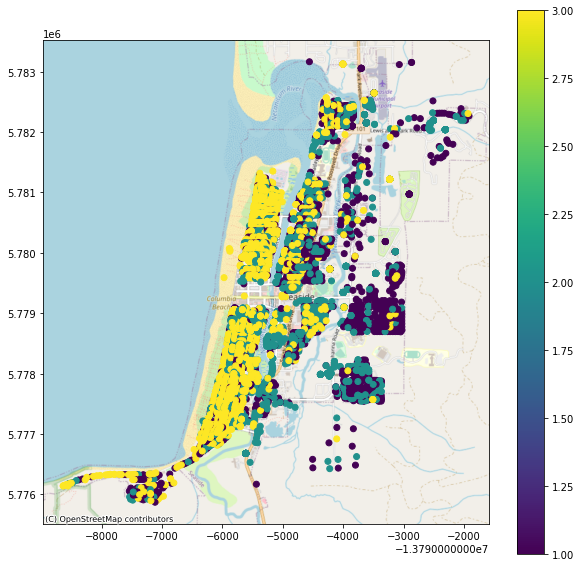

In [31]:
# visualize population
gdf = hua_gdf
map = viz.plot_gdf_map(gdf,column='ownershp')
map

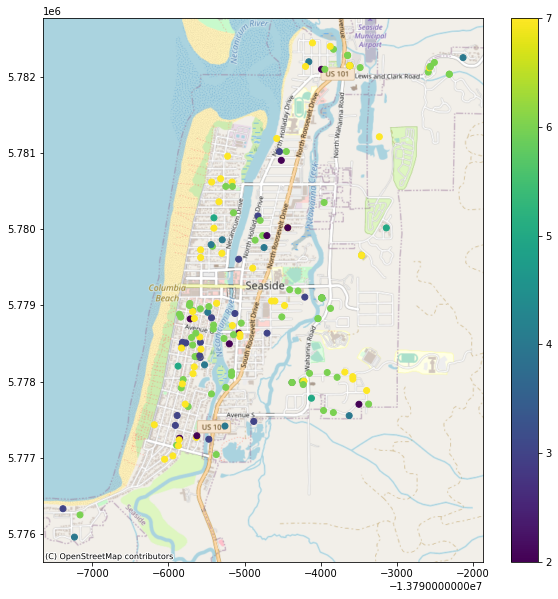

In [32]:
# visualize population by race and tenure status
minority_renters_gdf = hua_gdf.loc[(hua_gdf.race != 1) &
                                    (hua_gdf['Tenure Status'] == '2 Renter Occupied')]
map = viz.plot_gdf_map(minority_renters_gdf,column='race')
map

In [33]:
# What location should the map be centered on?
center_x = hua_gdf.bounds.minx.mean()
center_y = hua_gdf.bounds.miny.mean()
center_x, center_y

(-123.92208882309136, 45.993245623631466)

In [34]:
# https://ipyleaflet.readthedocs.io/en/latest/api_reference/heatmap.html
import ipyleaflet as ipylft
from ipyleaflet import Map, Heatmap

In [35]:
print("ipyleaflet Version ",ipylft.__version__)

ipyleaflet Version  0.13.6


In [36]:
popdata = minority_renters_gdf[['y','x','numprec']].values.tolist()

In [37]:
from ipyleaflet import Map, Heatmap, LayersControl

map = Map(center=[center_y,center_x], zoom=13)

minority_renters_gdf = Heatmap(
    locations = popdata,
    radius = 10, 
    max_val = 1000, 
    blur = 10, 
    gradient={0.2: 'yellow', 0.5: 'orange', 1.0: 'red'},
    name = 'Minority Renters',
)

map.add_layer(minority_renters_gdf);
control = LayersControl(position='topright')
map.add_control(control)
map

Map(center=[45.993245623631466, -123.92208882309136], controls=(ZoomControl(options=['position', 'zoom_in_text…